Exercício: Análise Estatística de Notas de Alunos
Você é um cientista de dados atuando em uma instituição de ensino. A equipe pedagógica solicitou uma análise detalhada de desempenho dos alunos a partir de um arquivo com 200 notas.

Preencha as células de código abaixo com os cálculos e gráficos solicitados.

1. Importação de bibliotecas

In [2]:
# 📦 Escreva aqui os imports necessários

import pandas as pd         # Importa a biblioteca pandas, usada para manipulação e análise de dados em formato de tabelas (DataFrames).
import numpy as np          # Importa a biblioteca NumPy, útil para operações matemáticas e estatísticas com arrays.
import seaborn as sns       # Importa o Seaborn, biblioteca de visualização baseada no matplotlib, com foco em estatísticas.
import matplotlib.pyplot as plt  # Importa o matplotlib, biblioteca para criar gráficos e visualizações personalizadas.
from scipy import stats     # Importa funções estatísticas avançadas da biblioteca SciPy (ex: moda, testes de normalidade, etc).

# Configuração dos gráficos

sns.set(style="whitegrid")  # Define o estilo visual dos gráficos do Seaborn como "whitegrid", que deixa o fundo branco com uma grade leve.
plt.rcParams["figure.figsize"] = (10, 6)  # Define o tamanho padrão dos gráficos gerados (largura 10, altura 6).


2. Leitura do dataset

In [4]:
# 📂 Leia o arquivo notas_alunos.csv aqui
dados = pd.read_csv('../data/notas_alunos.csv')  # Lê o arquivo CSV 'notas_alunos.csv' localizado no diretório '../data' e armazena os dados na variável 'dados'.

# Limpeza dos nomes de colunas (caso venham com espaços)
dados.columns = dados.columns.str.strip()  # Remove espaços em branco extras do início e do fim de cada nome de coluna.

# Visualizar as 5 primeiras linhas
dados.head()  # Exibe as 5 primeiras linhas do DataFrame para uma rápida visualização dos dados.


,ID_Aluno,Nota
0,1,7.7
1,2,6.8
2,3,8.0
3,4,9.3
4,5,6.6


3. Estatística Descritiva

In [5]:
# 📊 Calcule e imprima: média, moda, mediana, variância, desvio padrão, amplitude, nota mínima e máxima

notas = dados['Nota']  # Acessa a coluna 'Nota' do DataFrame 'dados' e armazena os valores na variável 'notas'.

media = notas.mean()  # Calcula a média dos valores da coluna 'Nota' e armazena em 'media'.
moda = stats.mode(notas, keepdims=True).mode[0]  # Calcula a moda (valor mais frequente) da coluna 'Nota' e armazena em 'moda'. 'keepdims=True' mantém a dimensão do resultado.
mediana = notas.median()  # Calcula a mediana (valor do meio) dos valores da coluna 'Nota' e armazena em 'mediana'.
variancia = notas.var()  # Calcula a variância dos valores da coluna 'Nota' e armazena em 'variancia'.
desvio_padrao = notas.std()  # Calcula o desvio padrão (quantificação da dispersão) dos valores da coluna 'Nota' e armazena em 'desvio_padrao'.
amplitude = notas.max() - notas.min()  # Calcula a amplitude (diferença entre a maior e a menor nota) e armazena em 'amplitude'.
nota_min = notas.min()  # Acessa a nota mínima da coluna 'Nota' e armazena em 'nota_min'.
nota_max = notas.max()  # Acessa a nota máxima da coluna 'Nota' e armazena em 'nota_max'.

# Exibe os valores calculados com formatação apropriada
print(f"Média: {media:.2f}")  # Imprime a média com duas casas decimais.
print(f"Moda: {moda}")  # Imprime a moda.
print(f"Mediana: {mediana}")  # Imprime a mediana.
print(f"Variância: {variancia:.2f}")  # Imprime a variância com duas casas decimais.
print(f"Desvio Padrão: {desvio_padrao:.2f}")  # Imprime o desvio padrão com duas casas decimais.
print(f"Amplitude: {amplitude:.2f}")  # Imprime a amplitude com duas casas decimais.
print(f"Nota mínima: {nota_min}")  # Imprime a nota mínima.
print(f"Nota máxima: {nota_max}")  # Imprime a nota máxima.


Média: 6.92
Moda: 7.5
Mediana: 7.0
Variância: 1.87
Desvio Padrão: 1.37
Amplitude: 6.90
Nota mínima: 3.1
Nota máxima: 10.0


4. Classificação por faixas de nota

In [23]:
Insuficiente = dados[(dados['Nota'] >= 0) & (dados['Nota'] <= 4.9)]
Regular = dados[(dados['Nota'] >= 5) & (dados['Nota'] <= 6.9)]
Bom = dados[(dados['Nota'] >= 7) & (dados['Nota'] <= 8.9)]
Excelente = dados[(dados['Nota'] >= 9) & (dados['Nota'] <= 10)]

print(f'Insuficiente: {Insuficiente}')
print(f'Regular: {Regular}')
print(f'Bom: {Bom}')
print(f'Excelente: {Excelente}')

Insuficiente:      ID_Aluno  Nota         Faixa
13         14   4.1  Insuficiente
14         15   4.4  Insuficiente
19         20   4.9  Insuficiente
23         24   4.9  Insuficiente
37         38   4.1  Insuficiente
44         45   4.8  Insuficiente
49         50   4.4  Insuficiente
74         75   3.1  Insuficiente
79         80   4.0  Insuficiente
95         96   4.8  Insuficiente
100       101   4.9  Insuficiente
110       111   4.1  Insuficiente
123       124   4.9  Insuficiente
130       131   4.7  Insuficiente
142       143   4.6  Insuficiente
189       190   4.7  Insuficiente
Regular:      ID_Aluno  Nota    Faixa
1           2   6.8  Regular
4           5   6.6  Regular
5           6   6.6  Regular
8           9   6.3  Regular
10         11   6.3  Regular
..        ...   ...      ...
188       189   5.7  Regular
190       191   6.3  Regular
193       194   5.1  Regular
196       197   5.7  Regular
199       200   5.3  Regular

[82 rows x 3 columns]
Bom:      ID_Aluno  Nota Fai

5. Tabela com contagem e porcentagem por faixa

In [29]:
# 🧾 Tabela com quantidade e porcentagem
contagem_faixas = dados['Faixa'].value_counts().sort_index()
porcentagem_faixas = dados['Faixa'].value_counts(normalize=True).sort_index() * 100

tabela_faixas = pd.DataFrame({
    'Quantidade': contagem_faixas,
    'Porcentagem (%)': porcentagem_faixas.round(2)
})

print("\n📋 Tabela de distribuição por faixa:")
print(tabela_faixas)


📋 Tabela de distribuição por faixa:
              Quantidade  Porcentagem (%)
Faixa                                    
Insuficiente          16              8.0
Regular               82             41.0
Bom                   84             42.0
Excelente             18              9.0


6. Gráficos

a) Histograma com KDE

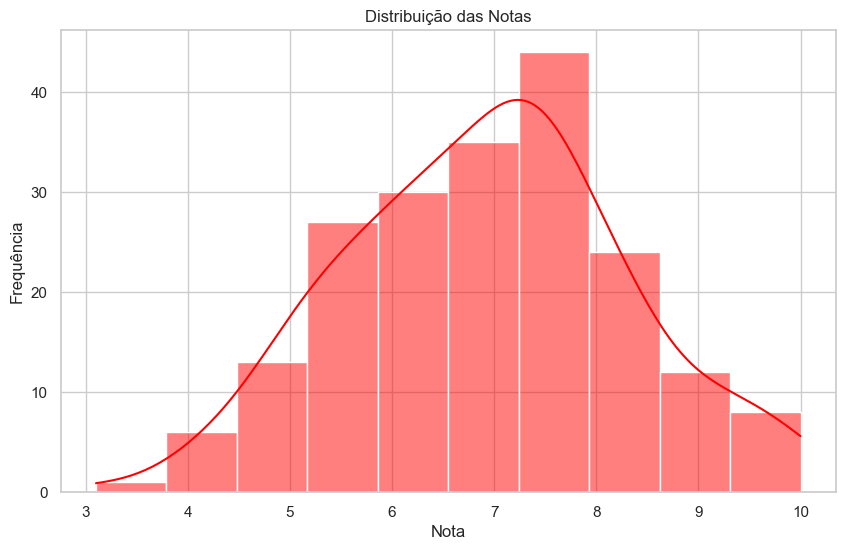

In [9]:
# 📊 Gere um histograma com KDE da distribuição de notas

sns.histplot(dados['Nota'], bins=10, kde=True, color='red')  # Gera o histograma das notas da coluna 'Nota', com 10 bins (intervalos), incluindo a curva de densidade (KDE) e colorido em vermelho.
plt.title('Distribuição das Notas')  # Adiciona o título "Distribuição das Notas" ao gráfico.
plt.xlabel('Nota')  # Define o rótulo do eixo X como "Nota".
plt.ylabel('Frequência')  # Define o rótulo do eixo Y como "Frequência".
plt.show()  # Exibe o gráfico gerado.


b) Boxplot das notas

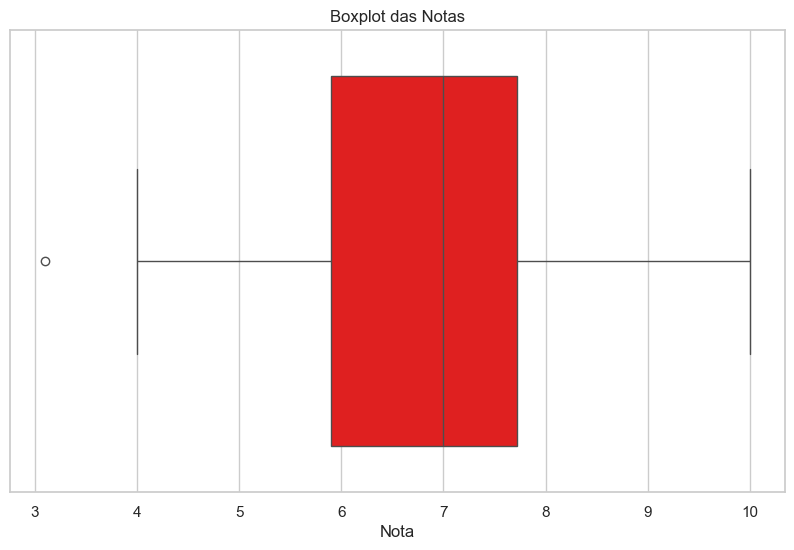

In [10]:
# 📦 Gere um boxplot das notas

sns.boxplot(x=dados['Nota'], color='red')  # Cria um boxplot das notas da coluna 'Nota', usando a cor vermelha para o gráfico.
plt.title('Boxplot das Notas')  # Adiciona o título "Boxplot das Notas" ao gráfico.
plt.xlabel('Nota')  # Define o rótulo do eixo X como "Nota".
plt.show()  # Exibe o gráfico do boxplot.


c) Gráfico de barras das faixas de nota

C:\Users\25170641\AppData\Local\Temp\ipykernel_17608\1053596249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Faixa', data=dados, palette='pastel')


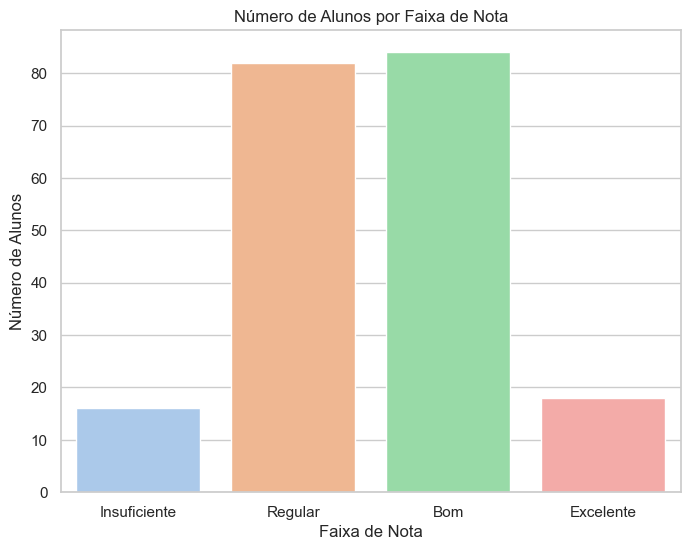

In [30]:
# 📊 Gráfico de barras por faixa
plt.figure(figsize=(8, 6))
sns.countplot(x='Faixa', data=dados, palette='pastel')
plt.title('Número de Alunos por Faixa de Nota')
plt.xlabel('Faixa de Nota')
plt.ylabel('Número de Alunos')
plt.show()

7. Conclusão


Propostas Pedagógicas:

Intervenções de apoio para estudantes com dificuldades:
Levando em conta a presença de alunos com desempenho classificado como "Regular" e possíveis casos isolados com baixo rendimento, propõe-se a formação de grupos de apoio e sessões de tutoria focadas na revisão dos fundamentos da disciplina. A intenção é diminuir as diferenças de desempenho por meio de um acompanhamento individualizado, que permita identificar lacunas no aprendizado e desenvolver um plano de estudos adaptado às necessidades de cada aluno.

Atividades ampliadas para estudantes com alto rendimento:
Para os alunos que se destacam com desempenho "Excelente", é interessante oferecer propostas mais desafiadoras, como projetos investigativos ou atividades de aprofundamento. Essas ações visam estimular competências mais complexas e promover o engajamento com conteúdos além do currículo padrão, incentivando o pensamento crítico e a autonomia no processo de aprendizagem.